# Movie Review Machine Learning Project

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tejaswini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_train.csv')

# Display the DataFrame
df_train

,review
0,"Shame, is a Swedish film in Swedish with Engli..."
1,I know it's rather unfair to comment on a movi...
2,"""Bread"" very sharply skewers the conventions o..."
3,After reading tons of good reviews about this ...
4,During the Civil war a wounded union soldier h...
...,...
39995,"As a Pagan, I must say this movie has little i..."
39996,A lot of the comments seem to treat this film ...
39997,I've only seen most of the series since I leav...
39998,"The ""all I have is 5 dollars and my wedding ri..."


In [12]:
# Read the CSV file into a DataFrame
X_production = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_final.csv')

# Display the DataFrame
X_production

,review
0,I first saw Heimat 2 on BBC2 in the 90's when ...
1,"I sat down to watch ""Midnight Cowboy"" thinking..."
2,I can never fathom why people take time to rev...
3,"With that line starts one silly, boring Britis..."
4,"Here's the spoiler: At the end of the movie, a..."
...,...
9995,"""Protocol"" is a hit-and-miss picture starring ..."
9996,"In the same vein as Natural Born Killers, anot..."
9997,"A sadly inferior precursor to ""Who's Afraid of..."
9998,"a real hoot, unintentionally. sidney portier's..."


## Data Cleaning and Sanity checks

In [13]:
# Convert df_train and X_production to strings if needed
df_train = df_train.astype(str)
X_production = X_production.astype(str)

In [72]:
# Checking missing values 
df_train.isnull().sum()

review    0
tokens    0
dtype: int64

In [73]:
# Checking missing values 
X_production.isnull().sum()

review    0
tokens    0
dtype: int64

In [14]:
from bs4 import BeautifulSoup
import re

# Coverting words to lower case from DataFrame
df_train = df_train.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Removing the HTML tags from DataFrame
df_train = df_train.applymap(lambda x: BeautifulSoup(x, "html.parser").get_text(separator=" ") if isinstance(x, str) else x)

# Removing special characters and punctuation from DataFrame
df_train = df_train.applymap(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x) if isinstance(x, str) else x)

# Remove extra spaces from DataFrame
df_train = df_train.applymap(lambda x: re.sub(r'\s+', ' ', x.strip()) if isinstance(x, str) else x)

df_train

,review
0,shame is a swedish film in swedish with englis...
1,i know its rather unfair to comment on a movie...
2,bread very sharply skewers the conventions of ...
3,after reading tons of good reviews about this ...
4,during the civil war a wounded union soldier h...
...,...
39995,as a pagan i must say this movie has little if...
39996,a lot of the comments seem to treat this film ...
39997,ive only seen most of the series since i leave...
39998,the all i have is 5 dollars and my wedding rin...


### Removing Stop words

#### df_Train

In [15]:
# Tokenize the reviews
nltk.download('punkt')
df_train['tokens'] = df_train['review'].apply(nltk.word_tokenize)

# Flatten the tokens
all_words = [word for tokens in df_train['tokens'] for word in tokens]

# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.lower() not in stop_words]


[nltk_data] Downloading package punkt to /Users/tejaswini/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
# Count the frequency of words
word_freq = Counter(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# Get the most common words and their frequencies
common_words = word_freq.most_common(10)

print(common_words)

[('movie', 68190), ('film', 60795), ('one', 40878), ('like', 31250), ('good', 23055), ('even', 19652), ('would', 19148), ('time', 19111), ('really', 18275), ('see', 18097)]


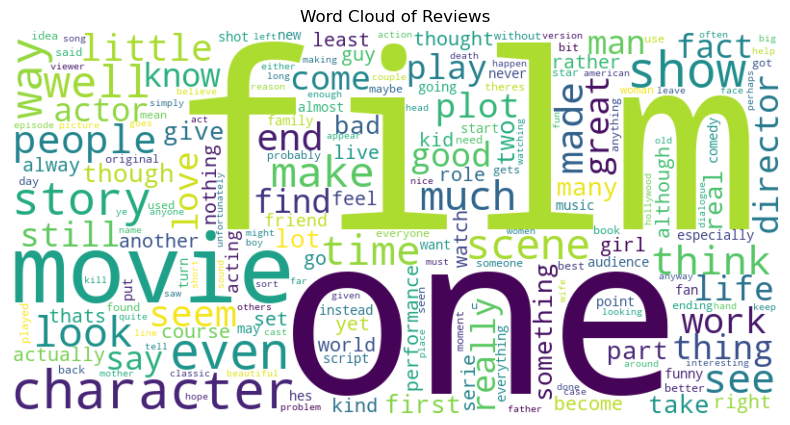

In [17]:
# Extract the words and their frequencies
words = [word[0] for word in common_words]
frequencies = [word[1] for word in common_words]

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

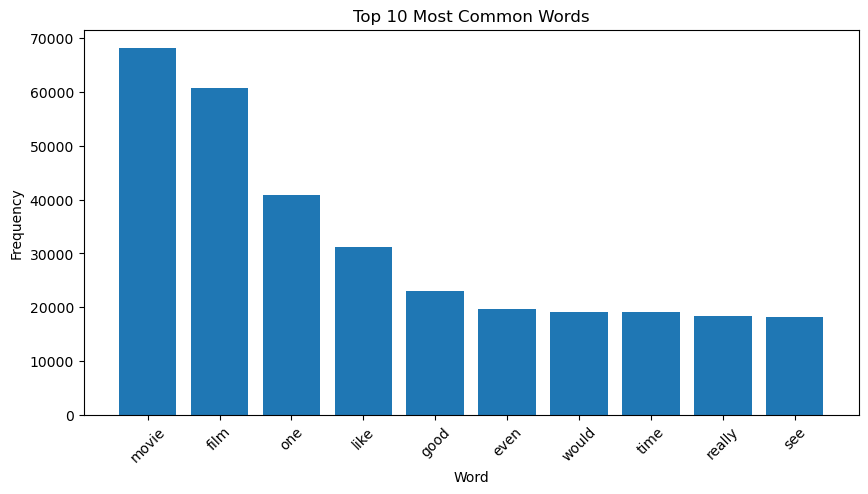

In [18]:
# Plot the bar chart of word frequencies
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

#### X_production

In [19]:
X_production = X_production.applymap(lambda x: x.lower() if isinstance(x, str) else x)

X_production = X_production.applymap(lambda x: BeautifulSoup(x, "html.parser").get_text(separator=" ") if isinstance(x, str) else x)

X_production = X_production.applymap(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x) if isinstance(x, str) else x)

X_production = X_production.applymap(lambda x: re.sub(r'\s+', ' ', x.strip()) if isinstance(x, str) else x)

X_production

,review
0,i first saw heimat 2 on bbc2 in the 90s when i...
1,i sat down to watch midnight cowboy thinking i...
2,i can never fathom why people take time to rev...
3,with that line starts one silly boring british...
4,heres the spoiler at the end of the movie a li...
...,...
9995,protocol is a hitandmiss picture starring gold...
9996,in the same vein as natural born killers anoth...
9997,a sadly inferior precursor to whos afraid of v...
9998,a real hoot unintentionally sidney portiers ch...


In [20]:
X_production['tokens'] = X_production['review'].apply(nltk.word_tokenize)

# Flatten the tokens
all_words_final = [word for tokens in X_production['tokens'] for word in tokens]

# Filter out stopwords
stop_words_final = set(stopwords.words('english'))
filtered_words_final = [word for word in all_words_final if word.lower() not in stop_words_final]

In [21]:
# Count the frequency of words
word_freq_final = Counter(filtered_words_final)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words_final))

# Get the most common words and their frequencies
common_words_final = word_freq_final.most_common(10)

print(common_words_final)

[('movie', 17035), ('film', 15235), ('one', 10598), ('like', 7814), ('good', 5857), ('even', 4931), ('would', 4888), ('time', 4851), ('really', 4736), ('story', 4621)]


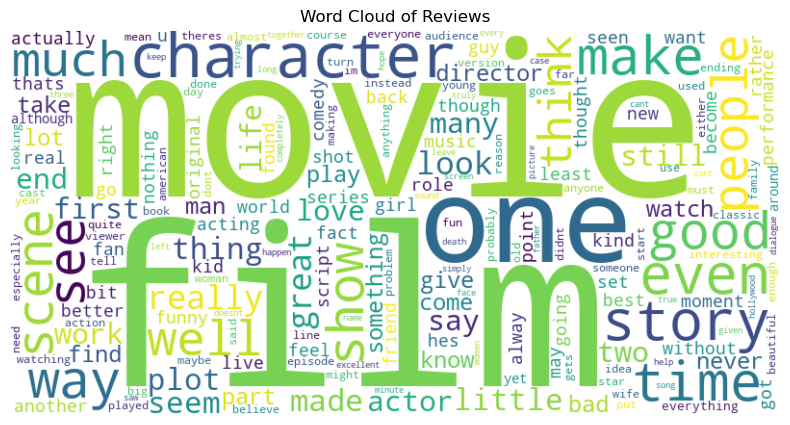

In [22]:
# Extract the words and their frequencies
words_f = [word[0] for word in common_words_final]
frequencies_f = [word[1] for word in common_words_final]

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

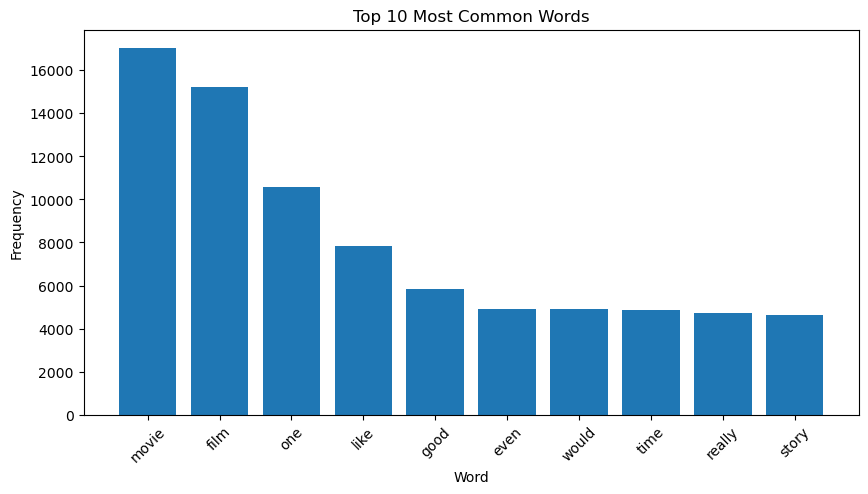

In [23]:
# Plot the bar chart of word frequencies
plt.figure(figsize=(10, 5))
plt.bar(words_f, frequencies_f)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

# Split the training dataset into train and test sets
X_train, X_test = train_test_split(df_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(32000, 2)
(8000, 2)


### Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['review'])

X_test_tfidf = tfidf_vectorizer.transform(X_test['review'])
# Transform the new data using the learned vocabulary and IDF values
X_production_tfidf = tfidf_vectorizer.transform(X_production['review'])

# Display the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", X_train_tfidf.shape)
print("test TF-IDF Matrix Shape:", X_test_tfidf.shape)
print("TF-IDF Matrix Final Shape:", X_production_tfidf.shape)

TF-IDF Matrix Shape: (32000, 129470)
test TF-IDF Matrix Shape: (8000, 129470)
TF-IDF Matrix Final Shape: (10000, 129470)


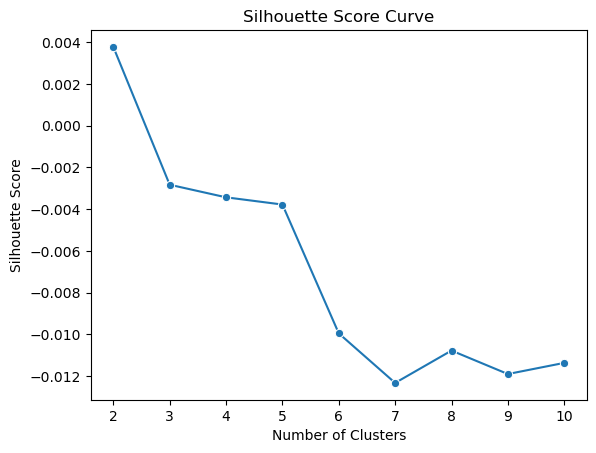

In [31]:
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Create a list to store the Silhouette Scores
silhouette_scores = []

# Perform clustering for different values of k
for k in range(2,11):
    # Create an instance of KMeans
    kmeans = KMeans(n_clusters=k, random_state=45)
    
    # Fit the data to the KMeans model
    kmeans.fit(X_train_tfidf)
    
    y_pred = kmeans.predict(X_train_tfidf)
    # Calculate the Silhouette Score
    score = silhouette_score(X_train_tfidf, y_pred)
    
    # Append the Silhouette Score to the list
    silhouette_scores.append(score)

# Plot the Silhouette Score curve using Seaborn
sns.lineplot(x=range(2,11), y=silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Curve')
plt.show()

> Here we can observe, After three clusters graph is dropping downwards so it would be good to choose three clusters.

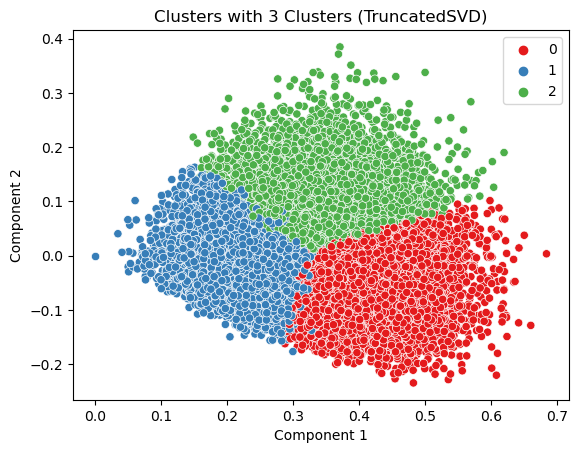

In [38]:
from sklearn.decomposition import TruncatedSVD

# Perform clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=45)
kmeans.fit(X_train_tfidf)

# Get the cluster labels
y_pred = kmeans.predict(X_train_tfidf)

# Perform dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=45)
reduced_features = svd.fit_transform(X_train_tfidf)

# Plot the clusters using Seaborn
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=y_pred, palette='Set1')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clusters with 3 Clusters (TruncatedSVD)')
plt.show()

> We can observe there are three clusters in the above graph.

### Implementing Models

In [40]:
# Create a pipeline
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Train the pipeline on the training set
pipeline.fit(X_train_tfidf)

# Predicting the clusters for the training data
y_train=pipeline.predict(X_train_tfidf)
# Predicting the clusters for the training data
y_test=pipeline.predict(X_test_tfidf)
# Predicting the clusters for the prod data
y_final=pipeline.predict(X_production_tfidf)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
# Initialize logistic regression model
logreg = LogisticRegression()

# Defining hyperparameter grid parameters
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']}
# Perform grid search using cross-validation (cv=5)
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# printing best params
best_params = grid_search.best_params_
best_logreg = grid_search.best_estimator_

print(best_params)
print(best_logreg)

{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)


In [54]:
# Predicting the labels for the training and testing data
y_train_pred = best_logreg.predict(X_train_tfidf)
y_test_pred = best_logreg.predict(X_test_tfidf)

# Calculating the accuracy, precision, recall, and F1 score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Training Accuracy: 0.99984375
Testing Accuracy: 0.981125
Precision: 0.9811747528300703
Recall: 0.981125
F1 Score: 0.9811128462027475


In [57]:
#  Evaluate the best model on the prod data
final_accuracy = grid_search.score(X_production_tfidf, y_final)
print("Final accuracy:", final_accuracy)

Final accuracy: 0.9779


> The logistic regression model achieved high accuracy and precision on both the training and testing data. It correctly predicted the class for almost all training instances and achieved an accuracy of 97.86% on unseen testing data. The model had a high rate of correctly identifying positive instances and captured a large portion of actual positive instances. Overall, the model performed well and demonstrated good classification performance.

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Initialize Decision tree model
dt_classifier = DecisionTreeClassifier()

param_grid = {'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform grid search using cross-validation (cv=5)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

In [65]:
print(best_params)
print(best_dt_classifier)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTreeClassifier(max_depth=10, min_samples_split=5)


In [60]:
# Predicting the labels for the training and testing data
y_train_pred = best_dt_classifier.predict(X_train_tfidf)
y_test_pred = best_dt_classifier.predict(X_test_tfidf)

# Calculating the accuracy, precision, recall, and F1 score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Training Accuracy: 0.89615625
Testing Accuracy: 0.786375
Precision: 0.7856686109852596
Recall: 0.786375
F1 Score: 0.7849266337494791


In [61]:
#  Evaluate the best model on the prod data
final_accuracy = grid_search.score(X_production_tfidf, y_final)
print("Final accuracy:", final_accuracy)

Final accuracy: 0.7899


>The decision tree model performed well with an accuracy of 89.6% on the training data and 78.6% on the testing data. It had a precision of 78.6%, meaning that 78.6% of the positive predictions were correct. The model also had a recall of 78.6%, indicating that it correctly identified 78.6% of the actual positive instances. The F1 score, which combines precision and recall, was 0.785, reflecting overall good performance.

## Summary

- We have cleaned the data by removing HTML tags, special characters, punctuations and also extra spaces.
- We have also removed stop words.
- We have visualized train and production datasets by implementing Word cloud.
- We have also visualized top 10 most common words from both data sets.
- We have implemented train and test split and then implemented TF-IDF vectorizor, this ensures there is not data leakage in test data.
- We have implemented Sillouette Score curve and observed that 3 clusters are best to use.
- We have implemented Logistic Regression, It got the accuracy score of 97.86%.
- We have implemented Decision Trees and got the accuracy of 78.6% on testing data.
- Logistic Regression is performing better.